In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_blobs
import numpy as np
import random 


#tf.enable_eager_execution()


def gen_cluster_data_list(Cv, Lv, Nv, Mv):
    Tr = []
    Ts = []
    C = Cv  # number of categories
    L = Lv   # number of centers
    N = Nv  # number of elements
    M = Mv  # number of dimensions
    X, y = make_blobs(n_samples=N, centers=L, n_features=M,cluster_std=.5, random_state=11)
    cmap = []
    for _ in range(L):
        cmap.append(random.randint(0,C-1))
    cols = []
    for i in range(N):
        cols.append(cmap[y[i]])

    for i in range(int(0.9*N)):
        row = [X[i,j] for j in range(M)]
        row.append(cols[i])
        Tr.append(row)
    
    for i in range(int(0.9*N)+1,N):
        row = [X[i,j] for j in range(M)]
        row.append(cols[i])
        Ts.append(row)
        
    return (Tr, Ts)

def normalize (train):
    mx = []
    mn = []
    for i in range(len(train[0])-1):
        mx.append(max([x[i] for x in train ]))
        mn.append(min([x[i] for x in train ]))
    for row in train:
        for i in range(len(row)-1):
            row[i] = (row[i] - mn[i]) / (mx[i] - mn[i]) 
    return train


def gen_data_array(Cv, Lv, Nv, Mv):
    C = Cv  # number of categories
    L = Lv   # number of centers
    N = Nv  # number of elements
    M = Mv  # number of dimensions
    (T1,T2)  = gen_cluster_data_list(C, L, N, M)

    T = normalize(T1)
    N = len(T)
    x2_train = np.zeros((N,M),dtype='float32')
    y2_train = np.zeros((N,C))
    for i in range(N):
        row = T[i]
        for j in range(M):
            x2_train[i,j] = row[j]
        y2_train[i,row[-1]] = 1

    Ts = normalize(T2)
    Ns = len(Ts)
    x2_test = np.zeros((Ns,M),dtype='float32')
    y2_test = np.zeros((Ns,C))
    for i in range(Ns):
        row = Ts[i]
        for j in range(M):
            x2_test[i,j] = row[j]
        y2_test[i, row[-1]] = 1
        
    return (x2_train,y2_train, x2_test, y2_test)

def gen_data_array_s(Cv, Lv, Nv, Mv):
    C = Cv  # number of categories
    L = Lv   # number of centers
    N = Nv  # number of elements
    M = Mv  # number of dimensions
    (T1,T2)  = gen_cluster_data_list(C, L, N, M)

    T = normalize(T1)
    N = len(T)
    x2_train = np.zeros((N,M),dtype='float32')
    y2_train = np.zeros((N,1))
    for i in range(N):
        row = T[i]
        for j in range(M):
            x2_train[i,j] = row[j]
        y2_train[i] = row[-1]

    Ts = normalize(T2)
    Ns = len(Ts)
    x2_test = np.zeros((Ns,M),dtype='float32')
    y2_test = np.zeros((Ns,1))
    for i in range(Ns):
        row = Ts[i]
        for j in range(M):
            x2_test[i,j] = row[j]
        y2_test[i] = row[-1]
        
    return (x2_train,y2_train, x2_test, y2_test)



[[0.8427796  0.3063155  0.32259515 0.4594482 ]
 [0.4889703  0.39130405 0.32502672 0.83326495]]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1, Loss: 2.553217887878418, Accuracy: 21.227779388427734, Test Accuracy: 31.515758514404297
Epoch 2, Loss: 1.9791476726531982, Accuracy: 37.31111145019531, Test Accuracy: 49.924964904785156
Epoch 3, Loss: 1.5717417001724243, Accuracy: 54.9555549621582, Test Accuracy: 66.33316802978516
Epoch 4, Loss

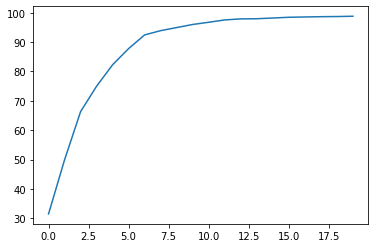

In [105]:
# P 05
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.activations import sigmoid
import matplotlib.pyplot as plt

class SSLayer(tf.keras.layers.Layer):
    def __init__(self,  num_outputs,activation=sigmoid,wstd = 0.3, bstd = 0.5):
        super(SSLayer, self).__init__()
        self.num_outputs = num_outputs
        self.activation = activation
        self.wstd = wstd
        self.bstd = bstd
        
    def build(self, input_shape):  
        self.kernel = self.add_weight("kernel",
                                      shape=[int(input_shape[-1]),
                                             self.num_outputs], 
                                      initializer=tf.keras.initializers.RandomNormal(stddev=self.wstd))
        #print ("kernel ", self.kernel)
        
        self.bias = self.add_weight("bias",
                                      shape=[self.num_outputs],
                                    initializer=tf.keras.initializers.RandomNormal(stddev=self.bstd))
        
        #print ("bias ", self.bias)

    
    '''  
    # F1 method
    def call(self, input):
        isp = input.shape
        In1 = tf.transpose(input)
        In2 = tf.stack([In1] * self.kernel.shape[1]) 
        InD = tf.transpose(In2)
        WD = tf.stack([self.kernel] * isp[0])
        ddd = WD - InD
        dd0 = tf.math.multiply(ddd, ddd)
        dd1 = tf.math.reduce_sum(dd0, axis =1)
        dd2 = tf.cast(dd1,tf.double)
        dd3 = tf.sqrt(dd2)
        d_r = tf.cast(dd3,tf.float32)
        d_R = tf.abs(self.bias)
        d_r_R = d_R - d_r  
        d_rR = tf.math.divide_no_nan(d_r_R,d_R)
        d_x0 = tf.math.scalar_mul(3,d_rR)
        d_x1 = tf.math.exp(d_x0)
        d_x = d_r_R + d_x1 - tf.ones(d_x1.shape)         
        result = self.activation(d_x)
        return result
    
    '''    
    # F2 method
    def call(self, input):
        isp = input.shape
        In1 = tf.transpose(input)
        In2 = tf.stack([In1] * self.kernel.shape[1]) 
        InD = tf.transpose(In2)
        WD = tf.stack([self.kernel] * isp[0])
        ddd = WD - InD
        dd0 = tf.math.multiply(ddd, ddd)
        dd1 = tf.math.reduce_sum(dd0, axis =1)
        dd2 = tf.cast(dd1,tf.double)
        dd3 = tf.sqrt(dd2)
        d_r = tf.cast(dd3,tf.float32)
        d_R = tf.abs(self.bias)
        d_rR = tf.math.divide_no_nan(d_r,d_R)
        d_x0 = tf.ones(d_rR.shape) - d_rR
        d_x1 = tf.math.scalar_mul(6,d_x0)
        result = self.activation(d_x1)
        return result
    
    

class NN_Model(Model):
    
  def __init__(self,c,l,n,m,h):
    self.C=c
    self.L=l
    self.N=n
    self.M=m
    self.H = h
    super(NN_Model, self).__init__()
    self.d1 = SSLayer(self.H)
    self.d2 = Dense(self.C)

  def call(self, x):
    x = self.d1(x)
    #print ("call benn:",x, tf.math.reduce_sum(x))
    return self.d2(x)

@tf.function
def train_step(datas, labels):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(datas, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

@tf.function
def test_step(datas, labels):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    
    predictions = model(datas, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

C= 20
L= 100
N= 20000
M= 4
H = 200

# Create an instance of the model
model = NN_Model(C,L,N,M,H)

loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
#loss_object = tf.keras.losses.CategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

(x_train,y_train,x_test,y_test) = gen_data_array(C, L, N, M)
print (x_train[:2])
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).batch(32)
#print (train_ds)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

    
EPOCHS = 20

X = []
Y = []
for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for datas, labels in train_ds:
        train_step(datas, labels)

    for test_datas, test_labels in test_ds:
        #print ("test_data_shape", test_datas.shape)
        predictions = model(test_datas, training=False)
        #print ("ttttttttttttttttttt")
        #for i in range(test_datas.shape[0]):
            #print (predictions.numpy()[i], test_labels.numpy()[i])
        test_step(test_datas, test_labels)
    
    X.append(epoch)
    Y.append(test_accuracy.result() * 100)
    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
        f'Test Accuracy: {test_accuracy.result() * 100}'
      )    

plt.plot(X, Y,label="Accuracy curve")

In [94]:
import statistics 

x = [99,99,99,99,99,99]
print (sum(x)/len(x), statistics.stdev(x))

97.0 0.9428090415820634
